# PROJECT: G2M Insights for Cab Investment Firm 

### WORK IN PROGRESS (to-do or thoughts of for WEEK 3): 
* LOOK INTO FORECASTING PLOTS
* MORE EDA?
    * DISTRIBUTION OF KM TRAVELLED
    * CONSIDER OTHER PLOTS FOR BETTER VISUALIZATION OR UPGRADE OF THE PLOTS?
* CONSIDER ADDITIONAL HYPOTHESIS TESTING?
* MAY CONSIDER MODEL BUILDING & DEVELOPMENT TO LOOK INTO KEY VARIABLES
* **WORKING ON PPT**

In [548]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## CAB DATAFRAME

In [549]:
cab_data = pd.read_csv("Dataset/Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


##### Checking for any missing values, duplicated values, and variable types 

In [550]:
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [551]:
cab_data.duplicated().sum()

0

In [552]:
cab_data.skew(axis = 0, skipna = True)

Transaction ID    0.000072
Date of Travel   -0.068004
KM Travelled      0.055779
Price Charged     0.873761
Cost of Trip      0.137958
dtype: float64

In [553]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


##### Changing the data type of 'Date of Travel'

In [554]:
cab_list = cab_data['Date of Travel'].to_list()
## determining the date from 01/31/2018 
base_data = pd.Timestamp("1899-12-30")
dates = [base_data + pd.DateOffset(date_offset) for date_offset in cab_list]
cab_data["Date of Travel"] = pd.to_datetime(dates, format = "%y/%m/%d")

In [484]:
min(dates)

Timestamp('2016-01-02 00:00:00')

In [485]:
max(dates)

Timestamp('2018-12-31 00:00:00')

In [555]:
cab_data["Date of Travel"].head()

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]

##### Looking into the numerical variables

In [556]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


##### Looking into the categorical variables

In [557]:
cab_data["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [558]:
cab_data["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

## CITY DATAFRAME

In [559]:
city_data = pd.read_csv("Dataset/City.csv")
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


##### Checking for missing values, duplicated values, and variable types

In [560]:
city_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [561]:
city_data.duplicated().sum()

0

In [564]:
cab_data.skew(axis = 0, skipna = True)

Transaction ID    0.000072
KM Travelled      0.055779
Price Charged     0.873761
Cost of Trip      0.137958
dtype: float64

In [565]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


##### Changing variable types for 'Population' and 'Users'

In [566]:
city_data["Population"] = [x.replace(',', '') for x in city_data["Population"]]
city_data["Population"].head(3)
city_data["Population"] = city_data["Population"].astype(int)
city_data["Population"].head(3)

0    8405837
1    1955130
2    1595037
Name: Population, dtype: int64

In [567]:
city_data["Users"] = [x.replace(',', '') for x in city_data["Users"]]
city_data["Users"].head(3)
city_data["Users"] = city_data["Users"].astype(int)
city_data["Users"].head(3)

0    302149
1    164468
2    144132
Name: Users, dtype: int64

In [568]:
city_data.skew(axis = 0, skipna = True)

Population    4.059691
Users         1.681674
dtype: float64

##### Looking into the numerical variables

In [569]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


## CUSTOMER ID DATAFRAME

In [570]:
customer_data = pd.read_csv("Dataset/Customer_ID.csv")
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


##### Checking for missing values, duplicated values, and variable types

In [571]:
customer_data.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [572]:
customer_data.duplicated().sum()

0

In [573]:
customer_data.skew(axis = 0, skipna = True)

Customer ID           0.141494
Age                   0.685934
Income (USD/Month)    0.313148
dtype: float64

In [574]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


##### Looking into the numerical variables

In [575]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


##### Looking into the categorical variables

In [576]:
customer_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## TRANSACTION ID DATAFRAME

In [577]:
transaction_data = pd.read_csv("Dataset/Transaction_ID.csv")
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


##### Checking for missing values, duplicated values, and variable types

In [578]:
transaction_data.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [505]:
transaction_data.duplicated().sum()

0

In [579]:
transaction_data.skew(axis = 0, skipna = True)

Transaction ID   -1.270848e-15
Customer ID       3.411342e-01
dtype: float64

In [580]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


##### Looking into numerical variables

In [581]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


##### Looking into categorical variables 

In [508]:
transaction_data["Payment_Mode"].unique()

array(['Card', 'Cash'], dtype=object)

## MERGE DATASETS INTO ONE 

In [523]:
cab_df = cab_data.merge(city_data, on = "City").merge(
    transaction_data, on = "Transaction ID").merge(
    customer_data, on = "Customer ID")
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


## VISUALIZE THE DATA

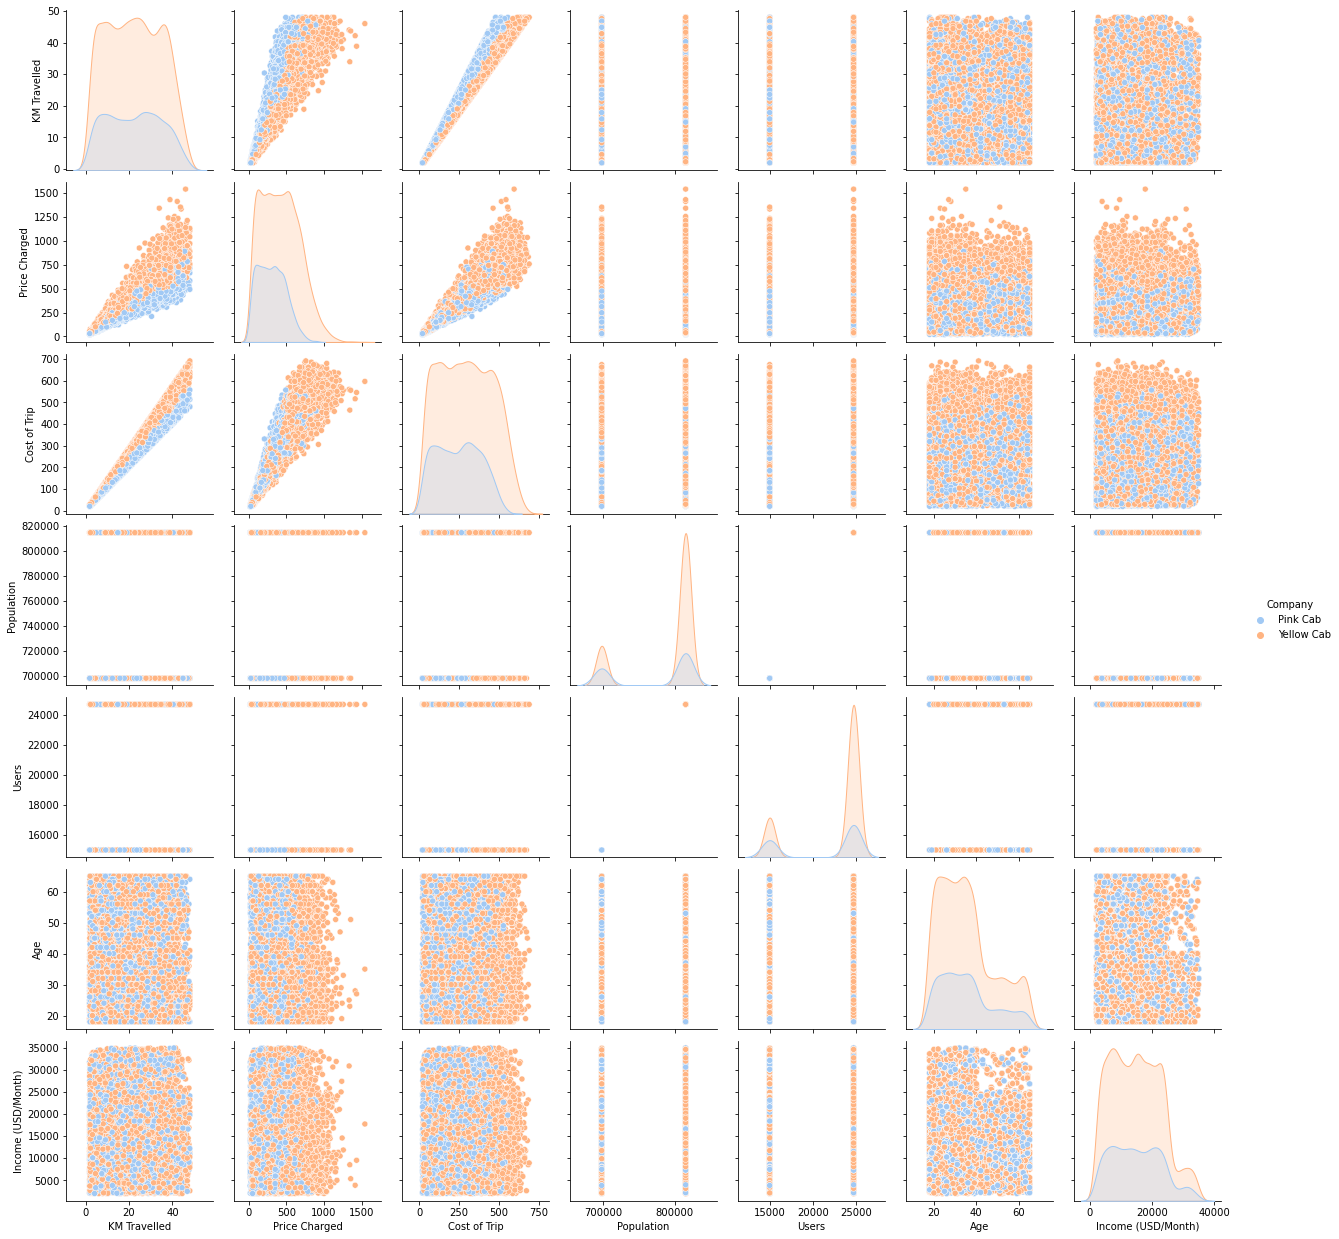

In [263]:
# Scatterplot 
num_cab_newdf = cab_df[["KM Travelled", "Price Charged", "Cost of Trip",
                      "Population", "Users", "Age", "Income (USD/Month)",
                          "Company"]]
sns.pairplot(num_cab_newdf.head(10000), hue = "Company", palette = "pastel")

Text(0.5, 1.0, 'G2M Correlation Heatmap')

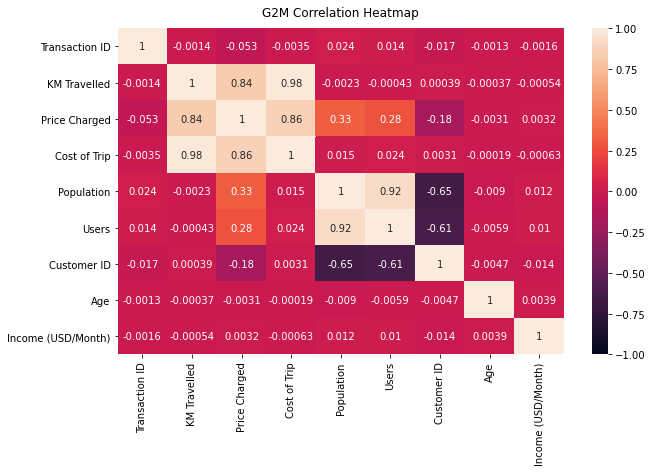

In [296]:
# Correlation Heatmap
cab_df.corr()

plt.figure(figsize = (10, 6))
heatmap = sns.heatmap(cab_df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title("G2M Correlation Heatmap", fontdict = {"fontsize":12}, 
                 pad = 12)

#### Obviously, Population and Users have a strong correlation at 0.92, indicating a positive relationship. Likewise, Price Charged with KM Travelled and Cost of Trip have a strong relatioinship at 0.84 and 0.86, respectively. KM Travelled and Cost of Trip have the strongest correlation at 0.98, which makes sense based on our intuition that the more the cab travels, the higher the fee to pay for the ride. 
#### We also see that Cost of Trip and Income have the weakest correlation.

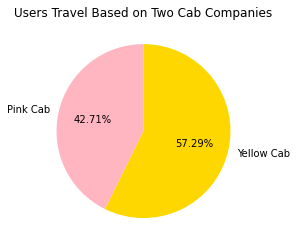

In [297]:
# Distribution of User Travel Based on Company 
user = cab_df.groupby("Company")
avg_user = user.Users.mean()
user_index = avg_user.index
user_value = avg_user.values

plt.pie(user_value, labels = user_index, autopct = "%1.2f%%", startangle = 90,
       colors = ["LightPink", "Gold"])
plt.title("Users Travel Based on Two Cab Companies")
plt.show()

#### Based on the pie chart, we can see users prefer to take Yellow Cab than Pink Cab

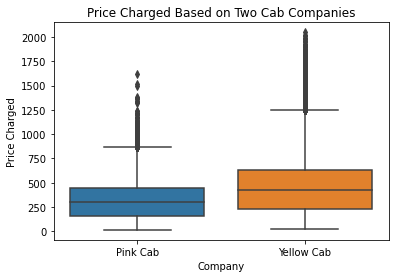

In [298]:
# Distribution of Price Charged Based on Company
sns.boxplot(cab_df["Company"], cab_df["Price Charged"])
plt.title("Price Charged Based on Two Cab Companies")
plt.show()

#### Based on the boxplot, we can see that Yellow Cab have a higher price charged compare to Pink Cab. This makes sense when considering how more users prefer Yellow Cab over Pink Cab, thus leads to a higher price charged due to more users

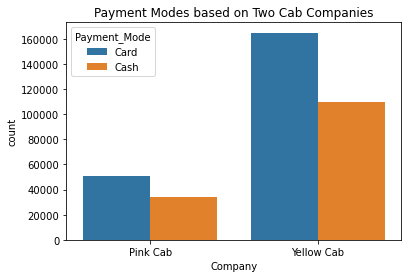

In [299]:
# Distribution of Payment Mode Based on Company 
sns.countplot(x = "Company", hue = "Payment_Mode", data = cab_df)
plt.title("Payment Modes based on Two Cab Companies")
plt.show()

#### We can see that cab users prefer to pay for their rides throguh card than with cash for both companies

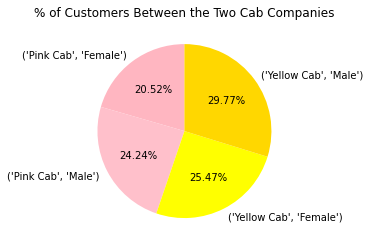

In [300]:
# Gender Distribution Based on Company 
gender = cab_df.groupby(["Company", "Gender"])
gender = gender["Customer ID"].nunique()

gender_index = gender.index
gender_vals = gender.values

plt.pie(gender_vals, labels = gender_index, autopct = "%1.2f%%", startangle = 90, 
       colors = ["LightPink", "Pink", "Yellow", "Gold"])
plt.title("% of Customers Between the Two Cab Companies")
plt.show()

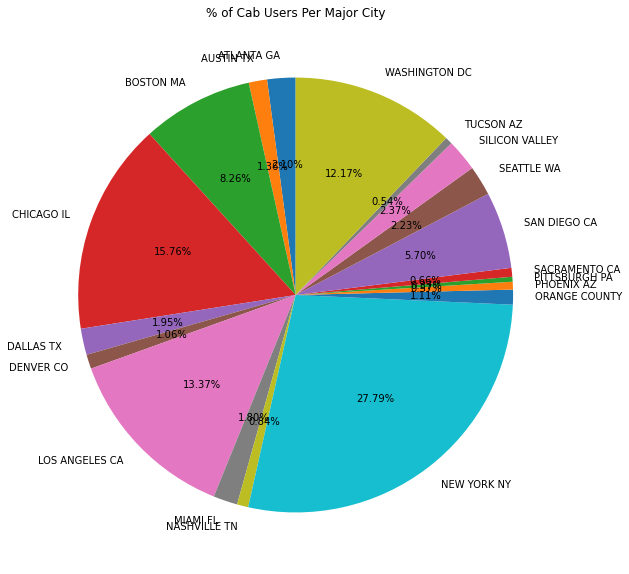

In [301]:
# Which City Do Most Users Used A Cab?
users = cab_df.groupby("City")
users = users["Users"].count()
users_labs = users.index
users_vals = users.values

plt.subplots(figsize = (12, 10))
plt.pie(users_vals, labels = users_labs, autopct = "%1.2f%%", startangle = 90)
plt.title("% of Cab Users Per Major City")
plt.show()

#### Most cab users reside in New York City with a 27.79%

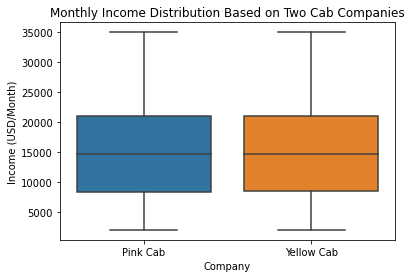

In [594]:
# Distribution of Income Based on Cab Companies
sns.boxplot(cab_df["Company"], cab_df["Income (USD/Month)"])
plt.title("Monthly Income Distribution Based on Two Cab Companies")
plt.show()

#### For both cab companies, we can see users' monthly average income is roughly 15k whom uses the cab services

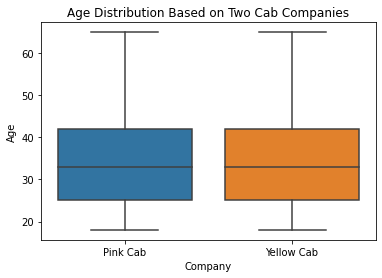

In [303]:
# Age Distribution Based on Cab Companies
sns.boxplot(cab_df["Company"], cab_df["Age"])
plt.title("Age Distribution Based on Two Cab Companies")
plt.show()

#### For both cab companies, we can see the users' average age is roughly around 33 years old

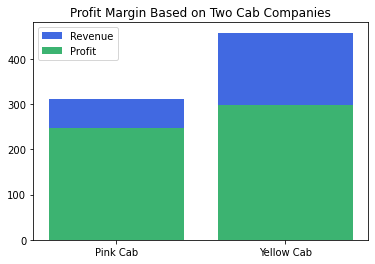

In [304]:
# Profit Margin Distribution Based on Cab Companies 
## NOTE: Profit Margin = Revenue (Price Charged) - Cost (Cost of Trip)

company = cab_df.groupby("Company")
price_charged = company["Price Charged"].mean()
cost_of_trip = company["Cost of Trip"].mean()

cost_of_trip.index = cost_of_trip.index
cost_of_trip.vals = cost_of_trip.values
price_charged.vals = price_charged.values

plt.bar(cost_of_trip.index, price_charged.vals, label = "Revenue", 
       color = "RoyalBlue")
plt.bar(cost_of_trip.index, cost_of_trip.vals, label = "Profit", 
       color = "Mediumseagreen")
plt.title("Profit Margin Based on Two Cab Companies")
plt.legend()
plt.show()

#### Based on the plot we can see that Yellow Cab company have a much higher profit margin in comparison to Pink Cab company 

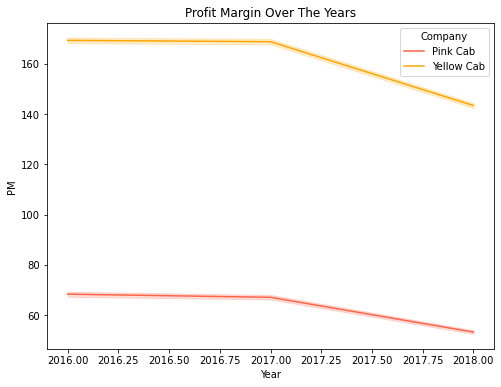

In [524]:
# LINE GRAPH: Profit Margin Over the Years Based on Cab Companies
cab_df["Year"] = cab_df["Date of Travel"].dt.year
cab_df["PM"] = cab_df["Price Charged"] - cab_df["Cost of Trip"]

plt.figure(figsize = (8, 6))
sns.lineplot(x = "Year", y = "PM", hue = "Company", data = cab_df,
            palette = ["Tomato", "Orange"])
plt.title("Profit Margin Over The Years")
plt.show()

#### Based on the line graph, we can see that profit margin for both cab companies decrease over the span of 2 years, and may continue to decrease looking at the trend of the graph

## CREATING MULTIPLE HYPOTHESIS TESTS AND INVESTIGATING

**HYPOTHESIS 1:** Is there a significant amount of difference between the expected profit margins between both cab companies?

>**H0:** There is no difference among the expected profit margins between both companies

>**HA:** There is a difference among the expected profit margins between both companies

In [536]:
PM_pink = (cab_df[(cab_df.Company == "Pink Cab")]).groupby("Transaction ID").PM.mean()
PM_yellow = (cab_df[(cab_df.Company == "Yellow Cab")]).groupby("Transaction ID").PM.mean()
PM_pink.mean = np.mean(PM_pink)
PM_yellow.mean = np.mean(PM_yellow)

print("The average profit margin for Pink Cab is", round(PM_pink.mean, 2))
print("The average profit margin for Yellow Cab is", round(PM_yellow.mean, 2))

# ANOVA - testing if the means of the two samples (pink and yellow cab) are equal
## typically use for more than 2 means but we will use it in this case (same result with t-test)
ttest, p_value = f_oneway(PM_pink.values,
                             PM_yellow.values)
print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in the expected profit margins depending on the cab company")
else:
    print("We fail to reject the null hypothesis that there is no difference in the expected profit margins depeding on the cab company")

The average profit margin for Pink Cab is 62.65
The average profit margin for Yellow Cab is 160.26
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in the expected profit margins depending on the cab company


We can see from our results from the hypothesis test that the resulted p-value is less than 0.5, showcasing strong evidence that the expected profit margin of Pink Cab Company is statistically different than the expected profit margin of Yellow Cab Company. 

**HYPOTHESIS 2:** Is there a significant amount of difference among the profits of both cab companies based on the gender of the users?

>**H0:** There is no difference among the profits in regards to Gender for each cab companies

>**HA:** There is a difference among the profits in regards to Gender for each companies

In [537]:
# PINK CAB COMPANY 
male = cab_df[(cab_df.Gender=='Male')&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
female = cab_df[(cab_df.Gender=='Female')&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
print("The number of male users that uses Pink Cab is", male.shape[0])
print("The number of female users that uses Pink Cab is", female.shape[0])

## performing student's t-test - whether the means of 2 iid samples are different
ttest, p_value = stats.ttest_ind(male.values,
                             female.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' gender for Pink Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference in profit regarding to the users' gender for Pink Cab")

The number of male users that uses Pink Cab is 47231
The number of female users that uses Pink Cab is 37480
P value is  0.1152
We fail to reject the null hypothesis that there is no difference in profit regarding to the users' gender for Pink Cab


In [538]:
# YELLOW CAB COMPANY 
male = cab_df[(cab_df.Gender=='Male')&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
female = cab_df[(cab_df.Gender=='Female')&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
print("The mean of male users that uses Yellow Cab is", male.shape[0])
print("The mean of female users that uses Yellow Cab is", female.shape[0])

ttest, p_value = stats.ttest_ind(male.values,
                             female.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' gender for Yellow Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference in profit regarding to the users' gender for Yellow Cab")

The mean of male users that uses Yellow Cab is 158681
The mean of female users that uses Yellow Cab is 116000
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' gender for Yellow Cab


For Yellow Cab Company, we got a p-value less than 0.05, indicating that we have strong evidence that the null hypothesis is false. Unlike for Pink Cab Company, we got p-value greater than 0.05, indicating that we do not have evidence that the null hypothesis is false.

**HYPOTHESIS 3:** Is there a significant amount of difference among the profits of both cab companies based on the old age of the users?

>**H0:** There is no difference among the profits in regards to those who are of old age for each cab companies

>**HA:** There is a difference among the profits in regards to those who are of old age for each companies 

_NOTE: We will define 'old age' to be users who are greater than or equal to 60 years of age_

In [540]:
# PINK CAB COMPANY 
under60 = cab_df[(cab_df.Age <= 60)&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
over60 = cab_df[(cab_df.Age > 60)&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
print("The number of users that is and less the age of 60 years old using Pink Cab is", under60.shape[0])
print("The number of users that greater than 60 years of age using Pink Cab is", over60.shape[0])

ttest, p_value = stats.ttest_ind(under60.values,
                             over60.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' old age for Pink Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference in profit regarding to the users' old age for Pink Cab")

The number of users that is and less the age of 60 years old using Pink Cab is 80125
The number of users that greater than 60 years of age using Pink Cab is 4586
P value is  0.188
We fail to reject the null hypothesis that there is no difference in profit regarding to the users' old age for Pink Cab


In [541]:
# YELLOW CAB COMPANY 
under60 = cab_df[(cab_df.Age <= 60)&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
over60 = cab_df[(cab_df.Age > 60)&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
print("The number of users that is and less the age of 60 years old using Yellow Cab is", under60.shape[0])
print("The number of users that greater than 60 years of age using Yellow Cab is", over60.shape[0])

ttest, p_value = stats.ttest_ind(under60.values,
                             over60.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' old age for Yellow Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference in profit regarding to the users' old age for Yellow Cab")

The number of users that is and less the age of 60 years old using Yellow Cab is 260356
The number of users that greater than 60 years of age using Yellow Cab is 14325
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the users' old age for Yellow Cab


For Yellow Cab Company, we got a p-value less than 0.05 (approzimately 0), indicating strong evidence that the null hypothesis is false, meaning that there is a price difference for users' of old age who uses their cab services. Unlike for Pink Cab Company, we got a p-value greater than 0.05, indicating that we do not have evidence that the null hypothesis is false, meaning that there is no price difference for users' of old age who uses their cab services.

**HYPOTHESIS 4:** Is there a significant amount of difference among the profits of both cab companies based on the region (east and west regions of the USA) where the users' use cab service?

>**H0:** There is no difference among the profits based on the region where the users' use the respective cab company

>**HA:** There is a difference among the profits based on the region where the users' use the respective cab company 

_NOTE: We will split the regions from the 'City' variables among west and east side of the USA_

In [544]:
# PINK CAB COMPANY
east = cab_df[cab_df.City.isin(["NEW YORK NY", "CHICAGO IL", "MIAMI FL", "ATLANTA GA", 
                               "PITTSBURGH PA", "WASHINGTON DC", "NASHVILLE TN", 
                               "BOSTON MA"]) & (cab_df.Company == "Pink Cab")].groupby("Transaction ID").PM.mean()
west = cab_df[cab_df.City.isin(["LOS ANGELES CA", "SILICON VALLEY", "ORANGE COUNTY", 
                               "SAN DIEGO CA", "PHOENIX AZ", "DALLAS TX", "DENVER CO", 
                               "AUSTIN TX", "SEATTLE WA", "TUCSON AZ", "SAN FRANCISCO CA", 
                               "SACRAMENTO CA"]) & (cab_df.Company == "Pink Cab")].groupby("Transaction ID").PM.mean()
print("The number of cab users that reside east of the USA is", east.shape[0])
print("The number of cab users that reside west of the USA is", west.shape[0])

ttest, p_value = stats.ttest_ind(east.values,
                             west.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the region where the users use Pink Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference among the profits regarding to the region where the users use Pink Cab")

The number of cab users that reside east of the USA is 38493
The number of cab users that reside west of the USA is 46218
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the region where the users use Pink Cab


In [547]:
# YELLOW CAB COMPANY
east = cab_df[cab_df.City.isin(["NEW YORK NY", "CHICAGO IL", "MIAMI FL", "ATLANTA GA", 
                               "PITTSBURGH PA", "WASHINGTON DC", "NASHVILLE TN", 
                               "BOSTON MA"]) & (cab_df.Company == "Yellow Cab")].groupby("Transaction ID").PM.mean()
west = cab_df[cab_df.City.isin(["LOS ANGELES CA", "SILICON VALLEY", "ORANGE COUNTY", 
                               "SAN DIEGO CA", "PHOENIX AZ", "DALLAS TX", "DENVER CO", 
                               "AUSTIN TX", "SEATTLE WA", "TUCSON AZ", "SAN FRANCISCO CA", 
                               "SACRAMENTO CA"]) & (cab_df.Company == "Yellow Cab")].groupby("Transaction ID").PM.mean()
print("The number of cab users that reside east of the USA is", east.shape[0])
print("The number of cab users that reside west of the USA is", west.shape[0])

ttest, p_value = stats.ttest_ind(east.values,
                             west.values,
                             equal_var=True)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the region where the users use Yellow Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference among the profits regarding to the region where the users use Yellow Cab")

The number of cab users that reside east of the USA is 209780
The number of cab users that reside west of the USA is 64901
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit regarding to the region where the users use Yellow Cab


For both companies, we can see from the hypothesis test that the p-value is approximately at 0, thus rejecting the null hypothesis. This tells us that there is a difference in profit regarding to the east and west side of the US region. Looking at the individual counts we can see that the majority of users whom use Pink Cab is from the west region, whereas the majority of users whom use Yellow Cab is from the east region. Yellow Cab users is about three times more than Pink Cab users.

**HYPOTHESIS 5:** Is there a significant amount of difference among the profits of both cab companies between low, mid, and high income class of the users' use cab service?

>**H0:** There is no difference among the profits in regards to users' income class for each cab companies

>**HA:** There is a difference among the profits in regards to users' income class for each companies

_NOTE: We will define create a new variable of 'Salary_Income' where the monthly income from 'Income (USD/Month)' is multiplied by 12 (12 months = 1 year)_

In [612]:
# PINK CAB COMPANY 
cab_df["Salary_Income"] = cab_df["Income (USD/Month)"]*12

low = cab_df[(cab_df.Salary_Income < 52200)&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
mid = cab_df[(cab_df.Salary_Income >= 52200)|(cab_df.Salary_Income <= 156600)&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()
high = cab_df[(cab_df.Salary_Income > 156600)&(cab_df.Company=='Pink Cab')].groupby('Transaction ID').PM.mean()

print("The number of low-income class users that uses Pink Cab is", low.shape[0])
print("The number of mid-income class users that uses Pink Cab is", mid.shape[0])
print("The number of high-income class users that uses Pink Cab is", high.shape[0])

ttest, p_value = f_oneway(low.values, 
                         mid.values, high.values)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit based on the users' income class that uses Pink Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference among the profits based on the users' income class that uses Pink Cab")

The number of low-income class users that uses Pink Cab is 7969
The number of mid-income class users that uses Pink Cab is 333668
The number of high-income class users that uses Pink Cab is 48069
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit based on the users' income class that uses Pink Cab


In [613]:
# YELLOW CAB COMPANY 
cab_df["Salary_Income"] = cab_df["Income (USD/Month)"]*12

low = cab_df[(cab_df.Salary_Income < 52200)&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
mid = cab_df[(cab_df.Salary_Income >= 52200)|(cab_df.Salary_Income <= 156600)&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()
high = cab_df[(cab_df.Salary_Income > 156600)&(cab_df.Company=='Yellow Cab')].groupby('Transaction ID').PM.mean()

print("The number of low-income class users that uses Yellow Cab is", low.shape[0])
print("The number of mid-income class users that uses Yellow Cab is", mid.shape[0])
print("The number of high-income class users that uses Yellow Cab is", high.shape[0])

ttest, p_value = f_oneway(low.values, 
                         mid.values, high.values)

print('P value is ', round(p_value, 4))

if(p_value < 0.05):
    print("We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit based on the users' income class that uses Yellow Cab")
else:
    print("We fail to reject the null hypothesis that there is no difference among the profits based on the users' income class that uses Yellow Cab")

The number of low-income class users that uses Yellow Cab is 25724
The number of mid-income class users that uses Yellow Cab is 351423
The number of high-income class users that uses Yellow Cab is 155244
P value is  0.0
We reject the null hypothesis, in favor of the alternative hypothesis, that there is a difference in profit based on the users' income class that uses Yellow Cab


For both companies, we can see from the hypothesis test that the p-value is approximately at 0, thus rejecting the null hypothesis. Indicating that there is a difference in profit based on the salary income of cab users for both Pink Cab and Yellow Cab companies. Looking at the individual account between the three income classes, we can discern that most users of Pink Cab and Yellow Cab are of the mid-income class, with the low-income class being the least amount of cab users. We can also take note that a majority of the users utilize Yellow Cab by a great amount in the low and high income classes. Yellow Cab company have the highest amount of users from the mid-income class compared to Pink Cab, but not by a significant amount like the other two classes.   